In [2]:
import math
import numpy as np
import pandas as pd

In [64]:
def goal_function(x1, x2):
    first = math.sin( math.pi * ( (x1/math.pi)**2 + (x2/math.pi)**2 )**0.5 )
    second = math.pi * ( (x1/math.pi)**2 + (x2/math.pi)**2 )**0.5
    return first / second

In [67]:
class Vector(object):
    def __init__(self, x, y):
        """ Create a vector, example: v = Vector(1,2) """
        self.x = x
        self.y = y

    def __repr__(self):
        return "({0}, {1})".format(self.x, self.y)

    def __add__(self, other):
        x = self.x + other.x
        y = self.y + other.y
        return Vector(x, y)

    def __sub__(self, other):
        x = self.x - other.x
        y = self.y - other.y
        return Vector(x, y)

    def __rmul__(self, other):
        x = self.x * other
        y = self.y * other
        return Vector(x, y)

    def __truediv__(self, other):
        x = self.x / other
        y = self.y / other
        return Vector(x, y)

    def c(self):
        return (self.x, self.y)

A = [4, 4.4934, 5]

# objective function
def g1(x1):
    return -x1 + 1

def g2(x2):
    return -x2 + 1

def g3(x1, x2, a):
    return np.sqrt(x1**2 + x2**2) - a

def internal_penalty(x1, x2, a):
    p_1 = g1(x1)
    p_2 = g2(x2)
    p_3 = g3(x1, x2, a)
    p_sum = sum([1/p for p in [p_1, p_2, p_3] if p > 0])
    # print( p_sum )
    return 0 if p_sum == 0 else -1*p_sum

def external_penalty(point, a, lambda_val):
    x1 = point.x
    x2 = point.y
    p_1 = g1(x1)
    p_2 = g2(x2)
    p_3 = g3(x1, x2, a)
    return  lambda_val * sum( [ max(0, p)**2 for p in [p_1, p_2, p_3] if p > 0 ] )

def f(point, lambda_val):
    x1, x2 = point
    first = np.sin(np.pi * np.sqrt((x1/np.pi)**2 + (x2/np.pi)**2))
    second = np.pi * np.sqrt((x1/np.pi)**2 + (x2/np.pi)**2)
    if second == 0:
        result = 0
    else:
        result = first/second
    return result + lambda_val*internal_penalty(x1, x2, A[0])

HISTORY = { 'b': [],
            'g': [],
            'w': [] }

def nelder_mead(alpha=0.5, beta=0.5, gamma=0.2, maxiter=20, lambda_val = 1.0):
    
    # initialization
    v1 = Vector(0, 0)
    v2 = Vector(1.0, 0)
    v3 = Vector(0, 1)

    for _ in range(maxiter):
        adict = {v1:f(v1.c(), lambda_val), v2:f(v2.c(), lambda_val), v3:f(v3.c(), lambda_val)}
        points = sorted(adict.items(), key=lambda x: x[1])
        
        b = points[0][0]
        g = points[1][0]
        w = points[2][0]
        HISTORY['b'].append([b.x, b.y])
        HISTORY['g'].append([g.x, g.y])
        HISTORY['w'].append([w.x, w.y])

        mid = (g + b)/2

        # reflection
        xr = mid + alpha * (mid - w)
        if f(xr.c(), lambda_val) < f(g.c(), lambda_val):
            w = xr
        else:
            if f(xr.c(), lambda_val) < f(w.c(), lambda_val):
                w = xr
            c = (w + mid)/2
            if f(c.c(), lambda_val) < f(w.c(), lambda_val):
                w = c
        if f(xr.c(), lambda_val) < f(b.c(), lambda_val):

            # expansion
            xe = mid + gamma * (xr - mid)
            if f(xe.c(), lambda_val) < f(xr.c(), lambda_val):
                w = xe
            else:
                w = xr
        if f(xr.c(), lambda_val) > f(g.c(), lambda_val):
            
            # contraction
            xc = mid + beta * (w - mid)
            if f(xc.c(), lambda_val) < f(w.c(), lambda_val):
                w = xc
        
        # update points
        v1 = w + Vector(external_penalty(w, A[0], lambda_val), external_penalty(w, A[0], lambda_val))
        v2 = g + Vector(external_penalty(g, A[0], lambda_val), external_penalty(g, A[0], lambda_val))
        v3 = b + Vector(external_penalty(b, A[0], lambda_val), external_penalty(w, A[0], lambda_val))
    return b

print("Result of Nelder-Mead algorithm: ")
xk = nelder_mead()
print(xk)
# print("Best poits is: %s"%(xk))

Result of Nelder-Mead algorithm: 
(3.497206227765879, 1.941552857340223)


/var/folders/h5/64qykf294zn3ggth49z4d8pm0000gn/T/ipykernel_83798/3340761842.py:8: RuntimeWarning: invalid value encountered in divide
  return first / second


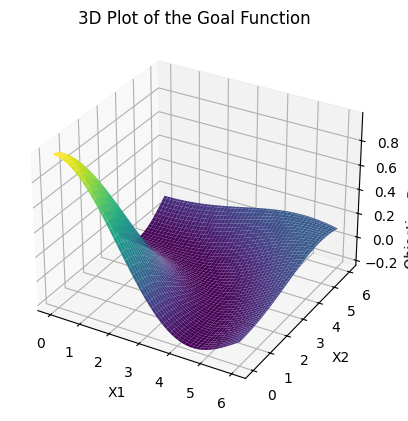

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def goal_function(x1, x2):
    first = np.sin(np.pi * ((x1/np.pi)**2 + (x2/np.pi)**2)**0.5)
    second = np.pi * ((x1/np.pi)**2 + (x2/np.pi)**2)**0.5
    return first / second

# Генерация данных для построения графика
x1 = np.linspace(0, 6, 100)
x2 = np.linspace(0, 6, 100)
x1, x2 = np.meshgrid(x1, x2)
z = goal_function(x1, x2)

# Строим 3D график
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x1, x2, z, cmap='viridis')

# Настройка осей
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Objective Function Value')
ax.set_title('3D Plot of the Goal Function')

plt.show()


/var/folders/h5/64qykf294zn3ggth49z4d8pm0000gn/T/ipykernel_83798/3198726799.py:8: RuntimeWarning: invalid value encountered in divide
  return first / second
/var/folders/h5/64qykf294zn3ggth49z4d8pm0000gn/T/ipykernel_83798/3198726799.py:8: RuntimeWarning: invalid value encountered in scalar divide
  return first / second


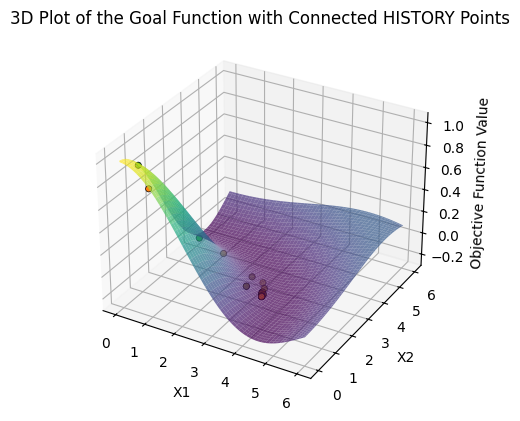

In [100]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def goal_function(x1, x2):
    first = np.sin(np.pi * ((x1/np.pi)**2 + (x2/np.pi)**2)**0.5)
    second = np.pi * ((x1/np.pi)**2 + (x2/np.pi)**2)**0.5
    return first / second

x1 = np.linspace(0, 6, 100)
x2 = np.linspace(0, 6, 100)
x1, x2 = np.meshgrid(x1, x2)
z = goal_function(x1, x2)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x1, x2, z, cmap='viridis', alpha=0.7)

for key, points in HISTORY.items():
    points = np.array(points)
    ax.scatter(points[:, 0], points[:, 1], [goal_function(x1, x2) for x1, x2 in points], label=key.upper(),
               marker='o', s=20, linewidths=0.5, edgecolors='k')

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Objective Function Value')
ax.set_title('3D Plot of the Goal Function with Connected HISTORY Points')
# ax.view_init(elev=90, azim=45)
plt.show()